<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes
from datetime import datetime, date, time, timezone, timedelta 
import os
import re
from functools import reduce
from collections import defaultdict, ChainMap, Counter

# customer analysis

In [2]:
os.listdir()

['.config',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'test.csv',
 'ecommerce-data.csv',
 'sample_data']

In [7]:
df = pd.read_csv('ecommerce-data.csv', encoding = 'unicode_escape')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [8]:
df.columns = ['_'.join(re.split(r'(?=[A-Z][a-z])', a[0].lower()+a[1:])).lower().replace(' ','_') for a in df.columns]
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [10]:
df.invoice_date = pd.to_datetime(df.invoice_date)
df['date'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['month'] = df.invoice_date.to_numpy().astype('datetime64[M]')
df['week'] = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]')
df['rev'] = df.quantity * df.unit_price
df = df[(~df.invoice_no.astype(str).str.contains('C')) & (df.country == 'United Kingdom')]
df = df.rename(columns = {'customerid':'id','description':'desc'}).groupby(['id','date','week','month','desc'])['rev'].sum().reset_index()
df.head()

,id,date,week,month,desc,rev
0,12346.0,2011-01-18,2011-01-17,2011-01-01,MEDIUM CERAMIC TOP STORAGE JAR,77183.60
1,12747.0,2010-12-05,2010-11-29,2010-12-01,ASSORTED COLOUR BIRD ORNAMENT,27.04
2,12747.0,2010-12-05,2010-11-29,2010-12-01,BLUE JUICY FRUIT PHOTO FRAME,15.30
3,12747.0,2010-12-05,2010-11-29,2010-12-01,CREAM SWEETHEART LETTER RACK,32.70
4,12747.0,2010-12-05,2010-11-29,2010-12-01,GREEN JUICY FRUIT PHOTO FRAME,30.60


In [12]:
list_npu = df.groupby(['id', 'desc'])['date'].min().reset_index().rename(columns = {'date':'npu_date'})
df_ = pd.merge(df, list_npu, 'left', ['id', 'desc'])
df_['days'] = (df_['date'] - df_['npu_date']).dt.days
cnt = df_.groupby(['desc', 'days'])['id'].count().reset_index().rename(columns = {'id':'pu'})
cnt['ratio'] = cnt.groupby(['desc'])['pu'].apply(lambda x : round(x/x.max()*100,2))
cnt = pd.melt(cnt, id_vars = ['desc', 'days'], var_name = 'type')
cnt.head()

,desc,days,type,value
0,4 PURPLE FLOCK DINNER CANDLES,0,pu,30.0
1,4 PURPLE FLOCK DINNER CANDLES,16,pu,1.0
2,4 PURPLE FLOCK DINNER CANDLES,153,pu,1.0
3,4 PURPLE FLOCK DINNER CANDLES,226,pu,1.0
4,4 PURPLE FLOCK DINNER CANDLES,285,pu,1.0


In [21]:
list_cnt = cnt[cnt.type == 'pu'].groupby(['desc'])['value'].max().reset_index().sort_values(['value'], ascending = 0)
list_cnt = list_cnt.head(20)
cnt2 = cnt[cnt.desc.isin(list_cnt.desc)]
cnt2.head()

,desc,days,type,value
4838,ASSORTED COLOUR BIRD ORNAMENT,0,pu,642.0
4839,ASSORTED COLOUR BIRD ORNAMENT,2,pu,1.0
4840,ASSORTED COLOUR BIRD ORNAMENT,4,pu,1.0
4841,ASSORTED COLOUR BIRD ORNAMENT,5,pu,2.0
4842,ASSORTED COLOUR BIRD ORNAMENT,6,pu,1.0


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


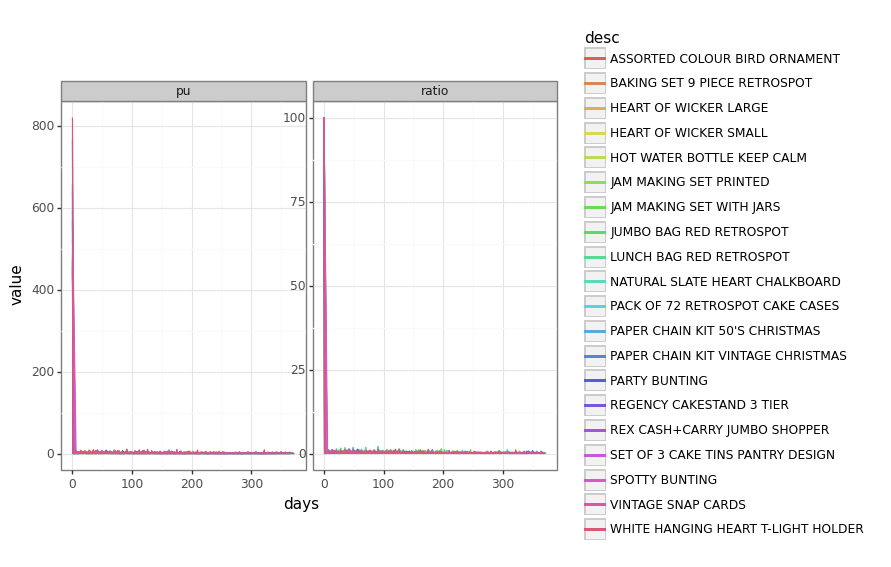

<ggplot: (8752039108937)>

In [22]:
(
    ggplot(cnt2, aes('days', 'value', color = 'desc')) + 
    gg.geom_line() +
    gg.facet_wrap('~type', scales = 'free_y') +
    gg.theme_bw()
)

# iterator

In [23]:
mat = [list('ABC'), list('DEF'), list('GHI')]
[({r},{c},{letters}) for r, rows in enumerate(mat) for c, letters in enumerate(rows)]

[({0}, {0}, {'A'}),
 ({0}, {1}, {'B'}),
 ({0}, {2}, {'C'}),
 ({1}, {0}, {'D'}),
 ({1}, {1}, {'E'}),
 ({1}, {2}, {'F'}),
 ({2}, {0}, {'G'}),
 ({2}, {1}, {'H'}),
 ({2}, {2}, {'I'})]

In [24]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [25]:
{key : eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])') for key in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [28]:
def add_arthor_with_name(name) :
  def add_name(func) :
    def wrapper(*args, **kwargs) :
      return name + '\n' + func(*args, **kwargs)
    return wrapper
  return add_name 

def add_arthor(func) :
  def wrapper(*args, **kwargs) :
    return 'kim' + '\n' + func(*args, **kwargs) 
  return wrapper

@add_arthor_with_name('park')
def get_title(title) :
  return title 

@add_arthor
def get_title2(t1, t2) :
  return t1 + ' ' + t2

In [30]:
print(get_title('니가 원하면 무엇이든'))
print(get_title2('해줄 수 없는 건', '오직 한가지 뿐야'))

park
니가 원하면 무엇이든
kim
해줄 수 없는 건 오직 한가지 뿐야
